In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from statsmodels.tsa.seasonal import seasonal_decompose

In [2]:
df = pd.read_csv(r"C:\Users\Muthu B\Downloads\Rose.csv")

In [3]:
df

,YearMonth,Rose
0,1980-01,112.0
1,1980-02,118.0
2,1980-03,129.0
3,1980-04,99.0
4,1980-05,116.0
...,...,...
182,1995-03,45.0
183,1995-04,52.0
184,1995-05,28.0
185,1995-06,40.0


In [4]:
df.dtypes

YearMonth     object
Rose         float64
dtype: object

In [5]:
df = pd.read_csv(r"C:\Users\Muthu B\Downloads\Rose.csv", parse_dates = ['YearMonth'])

In [6]:
df.dtypes

YearMonth    datetime64[ns]
Rose                float64
dtype: object

In [7]:
df = pd.read_csv(r"C:\Users\Muthu B\Downloads\Rose.csv", parse_dates = ['YearMonth'], index_col = 'YearMonth')

In [8]:
df.head()

,Rose
YearMonth,
1980-01-01,112.0
1980-02-01,118.0
1980-03-01,129.0
1980-04-01,99.0
1980-05-01,116.0


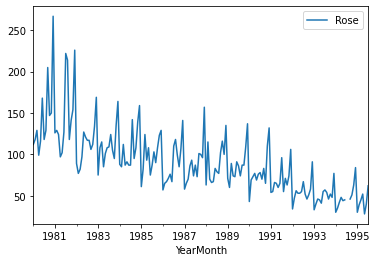

In [9]:
df.plot()
plt.show()

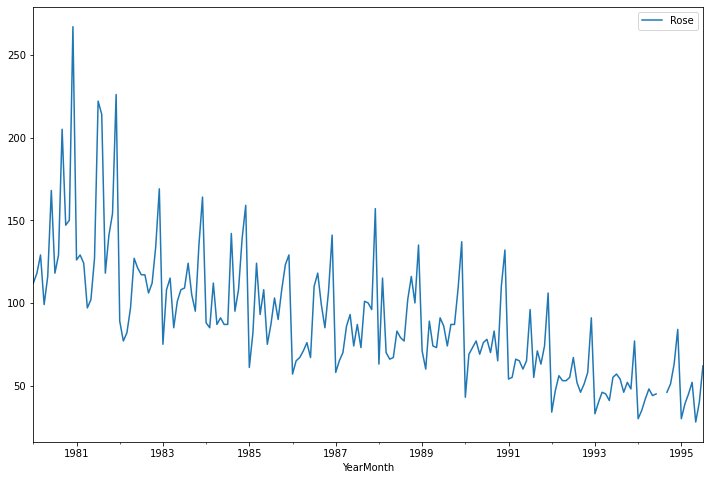

In [10]:
from pylab import rcParams
rcParams['figure.figsize'] = 12, 8
df.plot()
plt.show()

In [11]:
df.describe()

,Rose
count,185.000000
mean,90.394595
std,39.175344
min,28.000000
25%,63.000000
50%,86.000000
75%,112.000000
max,267.000000


In [12]:
df['1983']

,Rose
YearMonth,
1983-01-01,75.0
1983-02-01,108.0
1983-03-01,115.0
1983-04-01,85.0
1983-05-01,101.0
1983-06-01,108.0
1983-07-01,109.0
1983-08-01,124.0
1983-09-01,105.0


In [13]:
import seaborn as sns

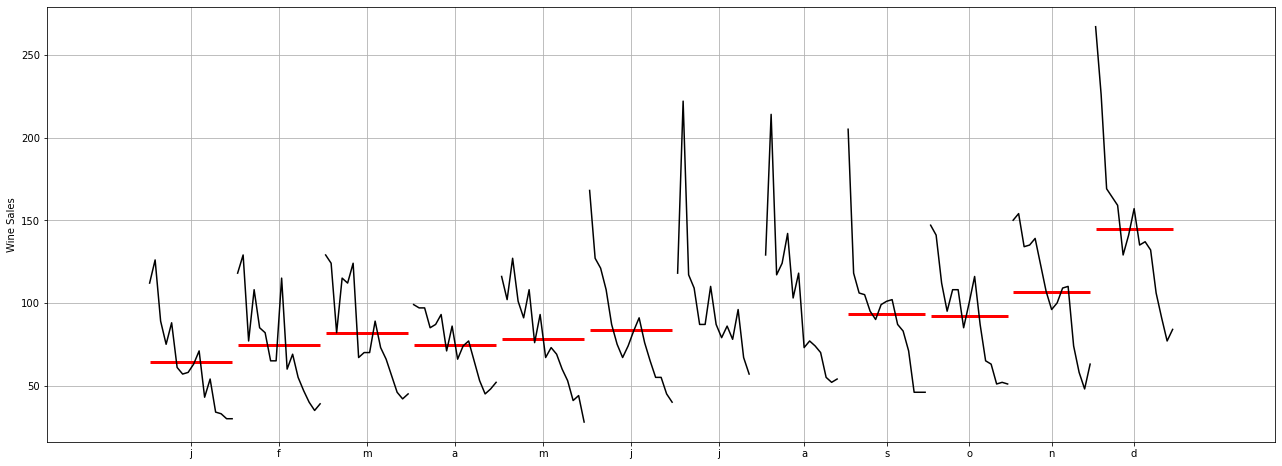

In [14]:
from statsmodels.graphics.tsaplots import month_plot

fig, ax = plt.subplots(figsize=(22,8))

month_plot(df,ylabel='Wine Sales',ax=ax)
plt.grid();

In [15]:
df.shape

(187, 1)

In [16]:
df.isnull().sum()

Rose    2
dtype: int64

In [33]:
df.interpolate(method='spline',order=3)['1994-07'].tail()

,Rose
YearMonth,
1994-07-01,43.656385


In [36]:
df.interpolate(method='spline',order=3)['1994-08'].tail()

,Rose
YearMonth,
1994-08-01,44.404582


In [37]:
df.isnull().sum()

Rose    0
dtype: int64

In [38]:
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 187 entries, 1980-01-01 to 1995-07-01
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Rose    187 non-null    float64
dtypes: float64(1)
memory usage: 2.9 KB


In [39]:
print(df.var())

Rose    1541.07395
dtype: float64


In [40]:
print(df.std())

Rose    39.256515
dtype: float64


In [41]:
#ADDITIVE DECOMPOSITION

In [42]:
df_add_decompose = seasonal_decompose(df, model = 'additive', period = 12)

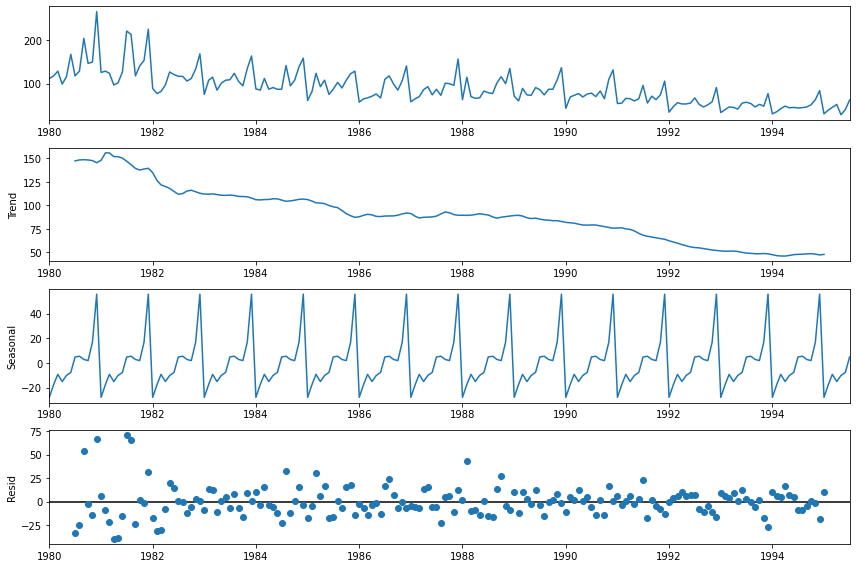

In [43]:
df_add_decompose.plot()
plt.show()

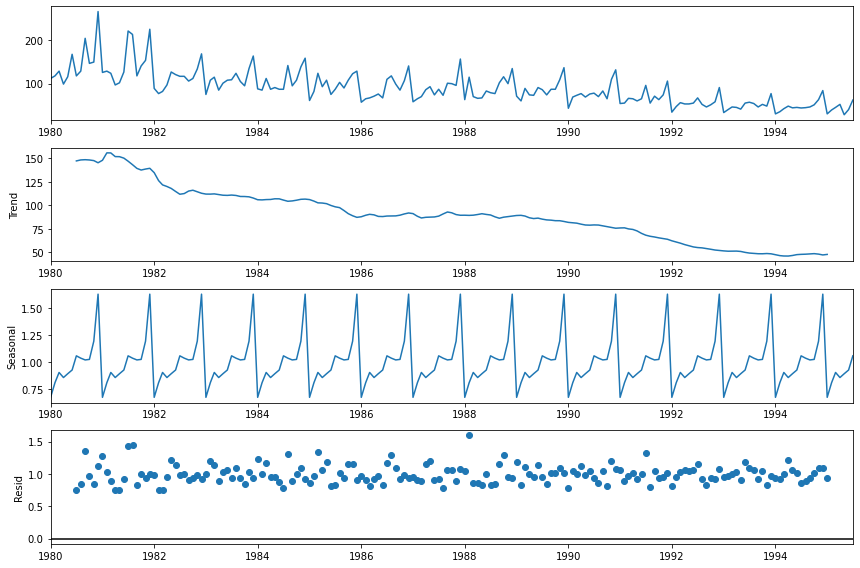

In [44]:
df_mul_decompose = seasonal_decompose(df, model = "multiplicative")
df_mul_decompose.plot()
plt.show()

In [45]:
import sklearn
import statsmodels

In [46]:
train = df[df.index<='1991'] 
test = df[df.index>'1991']

In [47]:
pip install statsmodels==0.12.0

Note: you may need to restart the kernel to use updated packages.


'C:\Users\Muthu' is not recognized as an internal or external command,
operable program or batch file.


In [49]:
import matplotlib.pyplot               as      plt
import statsmodels.tools.eval_measures as      em
from   sklearn.metrics                 import  mean_squared_error
from   statsmodels.tsa.api             import ExponentialSmoothing, SimpleExpSmoothing, Holt
from   IPython.display                 import display
from   pylab                           import rcParams

SES - ETS(A, N, N) - Simple Exponential Smoothing with additive errors

In [50]:
model_SES = SimpleExpSmoothing(train,initialization_method='estimated')

C:\Users\Muthu B\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'


In [51]:
model_SES_autofit = model_SES.fit(optimized=True)

In [52]:
model_SES_autofit.params

{'smoothing_level': 0.0976458329954194,
 'smoothing_trend': nan,
 'smoothing_seasonal': nan,
 'damping_trend': nan,
 'initial_level': 134.41613799002738,
 'initial_trend': nan,
 'initial_seasons': array([], dtype=float64),
 'use_boxcox': False,
 'lamda': None,
 'remove_bias': False}

In [53]:
SES_predict = model_SES_autofit.forecast(steps=len(test))
SES_predict

1991-02-01    83.845231
1991-03-01    83.845231
1991-04-01    83.845231
1991-05-01    83.845231
1991-06-01    83.845231
1991-07-01    83.845231
1991-08-01    83.845231
1991-09-01    83.845231
1991-10-01    83.845231
1991-11-01    83.845231
1991-12-01    83.845231
1992-01-01    83.845231
1992-02-01    83.845231
1992-03-01    83.845231
1992-04-01    83.845231
1992-05-01    83.845231
1992-06-01    83.845231
1992-07-01    83.845231
1992-08-01    83.845231
1992-09-01    83.845231
1992-10-01    83.845231
1992-11-01    83.845231
1992-12-01    83.845231
1993-01-01    83.845231
1993-02-01    83.845231
1993-03-01    83.845231
1993-04-01    83.845231
1993-05-01    83.845231
1993-06-01    83.845231
1993-07-01    83.845231
1993-08-01    83.845231
1993-09-01    83.845231
1993-10-01    83.845231
1993-11-01    83.845231
1993-12-01    83.845231
1994-01-01    83.845231
1994-02-01    83.845231
1994-03-01    83.845231
1994-04-01    83.845231
1994-05-01    83.845231
1994-06-01    83.845231
1994-07-01    83

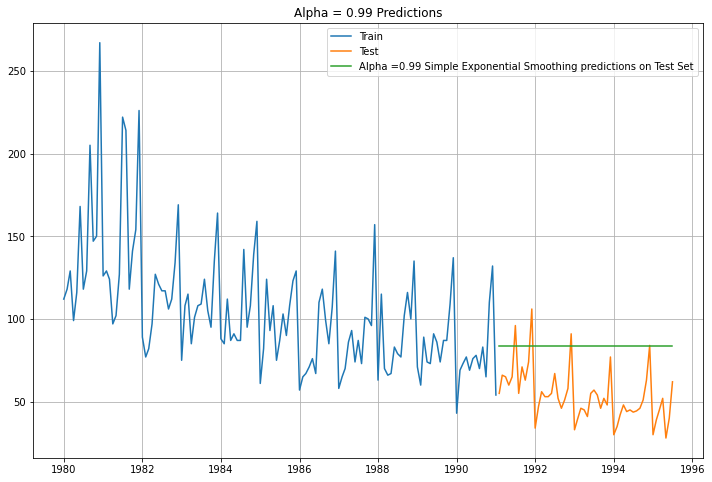

In [54]:
## Plotting the Training data, Test data and the forecasted values

plt.plot(train, label='Train')
plt.plot(test, label='Test')

plt.plot(SES_predict, label='Alpha =0.99 Simple Exponential Smoothing predictions on Test Set')

plt.legend(loc='best')
plt.grid()
plt.title('Alpha = 0.99 Predictions');

In [55]:
## Mean Absolute Percentage Error (MAPE) - Function Definition

def MAPE(y_true, y_pred):
    return np.mean((np.abs(y_true-y_pred))/(y_true))*100

In [56]:
print('SES RMSE:',mean_squared_error(test.values,SES_predict.values,squared=False))
#different way to calculate RMSE
print('SES RMSE (calculated using statsmodels):',em.rmse(test.values,SES_predict.values)[0])

SES RMSE: 34.01221504716553
SES RMSE (calculated using statsmodels): 34.01221504716553


In [57]:
resultsDf = pd.DataFrame({'Test RMSE': [em.rmse(test.values,SES_predict.values)[0]]},index=['Alpha=0.99,SES'])
resultsDf

,Test RMSE
"Alpha=0.99,SES",34.012215


Holt - ETS(A, A, N) - Holt's linear method with additive errors¶
Double Exponential Smoothing

In [58]:
# Initializing the Double Exponential Smoothing Model
model_DES = Holt(train,initialization_method='estimated')
# Fitting the model
model_DES = model_DES.fit()

print('')
print('==Holt model Exponential Smoothing Estimated Parameters ==')
print('')
print(model_DES.params)


==Holt model Exponential Smoothing Estimated Parameters ==

{'smoothing_level': 1.4909517459414515e-08, 'smoothing_trend': 1.2076252705633794e-08, 'smoothing_seasonal': nan, 'damping_trend': nan, 'initial_level': 138.0870894895201, 'initial_trend': -0.5004583886743472, 'initial_seasons': array([], dtype=float64), 'use_boxcox': False, 'lamda': None, 'remove_bias': False}


C:\Users\Muthu B\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'


In [59]:
DES_predict =  model_DES.forecast(len(test))
DES_predict

1991-02-01    71.025665
1991-03-01    70.525207
1991-04-01    70.024749
1991-05-01    69.524290
1991-06-01    69.023832
1991-07-01    68.523373
1991-08-01    68.022915
1991-09-01    67.522457
1991-10-01    67.021998
1991-11-01    66.521540
1991-12-01    66.021082
1992-01-01    65.520623
1992-02-01    65.020165
1992-03-01    64.519706
1992-04-01    64.019248
1992-05-01    63.518790
1992-06-01    63.018331
1992-07-01    62.517873
1992-08-01    62.017414
1992-09-01    61.516956
1992-10-01    61.016498
1992-11-01    60.516039
1992-12-01    60.015581
1993-01-01    59.515122
1993-02-01    59.014664
1993-03-01    58.514206
1993-04-01    58.013747
1993-05-01    57.513289
1993-06-01    57.012831
1993-07-01    56.512372
1993-08-01    56.011914
1993-09-01    55.511455
1993-10-01    55.010997
1993-11-01    54.510539
1993-12-01    54.010080
1994-01-01    53.509622
1994-02-01    53.009163
1994-03-01    52.508705
1994-04-01    52.008247
1994-05-01    51.507788
1994-06-01    51.007330
1994-07-01    50

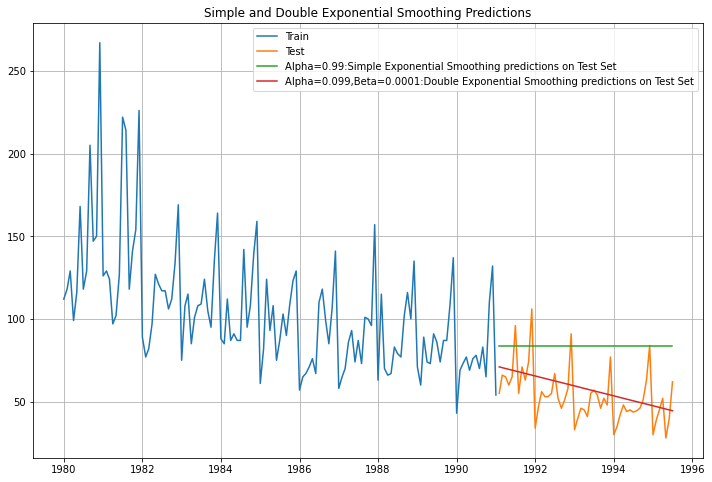

In [60]:
## Plotting the Training data, Test data and the forecasted values

plt.plot(train, label='Train')
plt.plot(test, label='Test')

plt.plot(SES_predict, label='Alpha=0.99:Simple Exponential Smoothing predictions on Test Set')
plt.plot(DES_predict, label='Alpha=0.099,Beta=0.0001:Double Exponential Smoothing predictions on Test Set')

plt.legend(loc='best')
plt.grid()
plt.title('Simple and Double Exponential Smoothing Predictions');

In [61]:
print('DES RMSE:',mean_squared_error(test.values,DES_predict.values,squared=False))

DES RMSE: 15.04085854702086


In [62]:
resultsDf_temp = pd.DataFrame({'Test RMSE': [mean_squared_error(test.values,DES_predict.values,squared=False)]}
                           ,index=['Alpha=1,Beta=0.0189:DES'])

resultsDf = pd.concat([resultsDf, resultsDf_temp])
resultsDf

,Test RMSE
"Alpha=0.99,SES",34.012215
"Alpha=1,Beta=0.0189:DES",15.040859


Holt-Winters - ETS(A, A, A) - Holt Winter's linear method with additive errors

In [63]:
model_TES = ExponentialSmoothing(train,trend='additive',seasonal='additive',initialization_method='estimated')
# Fitting the model
model_TES = model_TES.fit()

print('')
print('==Holt Winters model Exponential Smoothing Estimated Parameters ==')
print('')
print(model_TES.params)

C:\Users\Muthu B\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'



==Holt Winters model Exponential Smoothing Estimated Parameters ==

{'smoothing_level': 0.08790862977045176, 'smoothing_trend': 5.431641763432136e-05, 'smoothing_seasonal': 0.0012665740604416588, 'damping_trend': nan, 'initial_level': 146.6292561196369, 'initial_trend': -0.5396152168640709, 'initial_seasons': array([-30.35139488, -18.86570485, -10.87415795, -21.52005976,
       -12.71530481,  -7.27319281,   2.63964764,   8.72493914,
         4.72546394,   2.80882414,  20.8911158 ,  63.16535672]), 'use_boxcox': False, 'lamda': None, 'remove_bias': False}


In [64]:
TES_predict =  model_TES.forecast(len(test))
TES_predict

1991-02-01     55.468157
1991-03-01     62.919923
1991-04-01     51.734859
1991-05-01     59.999576
1991-06-01     64.901732
1991-07-01     74.274728
1991-08-01     79.820097
1991-09-01     75.281587
1991-10-01     72.825554
1991-11-01     90.368292
1991-12-01    132.101862
1992-01-01     38.033221
1992-02-01     48.992810
1992-03-01     56.444576
1992-04-01     45.259512
1992-05-01     53.524229
1992-06-01     58.426385
1992-07-01     67.799381
1992-08-01     73.344750
1992-09-01     68.806240
1992-10-01     66.350207
1992-11-01     83.892945
1992-12-01    125.626515
1993-01-01     31.557874
1993-02-01     42.517463
1993-03-01     49.969228
1993-04-01     38.784165
1993-05-01     47.048882
1993-06-01     51.951037
1993-07-01     61.324034
1993-08-01     66.869403
1993-09-01     62.330893
1993-10-01     59.874860
1993-11-01     77.417598
1993-12-01    119.151168
1994-01-01     25.082527
1994-02-01     36.042115
1994-03-01     43.493881
1994-04-01     32.308818
1994-05-01     40.573535


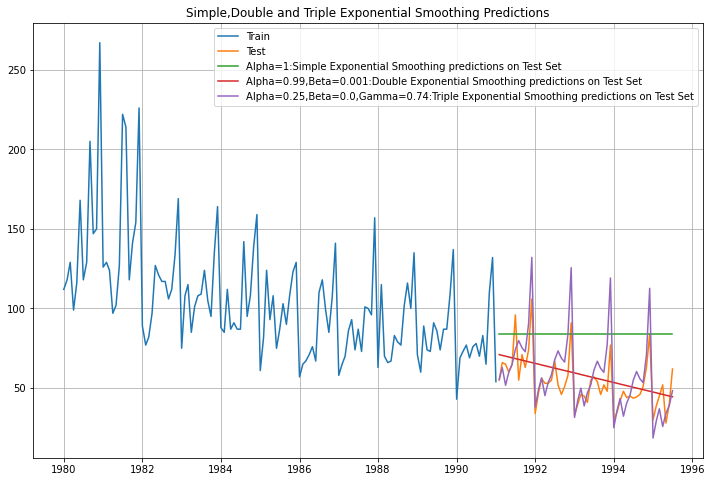

In [65]:
## Plotting the Training data, Test data and the forecasted values

plt.plot(train, label='Train')
plt.plot(test, label='Test')

plt.plot(SES_predict, label='Alpha=1:Simple Exponential Smoothing predictions on Test Set')
plt.plot(DES_predict, label='Alpha=0.99,Beta=0.001:Double Exponential Smoothing predictions on Test Set')
plt.plot(TES_predict, label='Alpha=0.25,Beta=0.0,Gamma=0.74:Triple Exponential Smoothing predictions on Test Set')

plt.legend(loc='best')
plt.grid()
plt.title('Simple,Double and Triple Exponential Smoothing Predictions');

In [66]:
print('TES RMSE:',mean_squared_error(test.values,TES_predict.values,squared=False))

TES RMSE: 14.67005710031762


In [67]:
resultsDf_temp = pd.DataFrame({'Test RMSE': [mean_squared_error(test.values,TES_predict.values,squared=False)]}
                           ,index=['Alpha=0.25,Beta=0.0,Gamma=0.74:TES'])

resultsDf = pd.concat([resultsDf, resultsDf_temp])
resultsDf

,Test RMSE
"Alpha=0.99,SES",34.012215
"Alpha=1,Beta=0.0189:DES",15.040859
"Alpha=0.25,Beta=0.0,Gamma=0.74:TES",14.670057


Holt-Winters - ETS(A, A, M) - Holt Winter's linear method¶
ETS(A, A, M) model

In [68]:
# Initializing the Double Exponential Smoothing Model
model_TES_am = ExponentialSmoothing(train,trend='add',seasonal='multiplicative',initialization_method='estimated')
# Fitting the model
model_TES_am = model_TES_am.fit()

print('')
print('==Holt Winters model Exponential Smoothing Estimated Parameters ==')
print('')
print(model_TES_am.params)

C:\Users\Muthu B\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'



==Holt Winters model Exponential Smoothing Estimated Parameters ==

{'smoothing_level': 0.07874740961217644, 'smoothing_trend': 0.03782619171920998, 'smoothing_seasonal': 0.0011412466948501337, 'damping_trend': nan, 'initial_level': 133.31400373447767, 'initial_trend': -0.7664459721159619, 'initial_seasons': array([0.83871763, 0.9517594 , 1.0409158 , 0.90945148, 1.02334674,
       1.11319327, 1.22478012, 1.30549177, 1.23208425, 1.20786878,
       1.40810923, 1.9412481 ]), 'use_boxcox': False, 'lamda': None, 'remove_bias': False}


In [69]:
TES_predict_am =  model_TES_am.forecast(len(test))
TES_predict_am

1991-02-01     62.945982
1991-03-01     68.582686
1991-04-01     59.723209
1991-05-01     66.920935
1991-06-01     72.482458
1991-07-01     79.459482
1991-08-01     84.366187
1991-09-01     79.365507
1991-10-01     77.519313
1991-11-01     90.041453
1991-12-01    123.597896
1992-01-01     53.200252
1992-02-01     60.177180
1992-03-01     65.554844
1992-04-01     57.076765
1992-05-01     63.944557
1992-06-01     69.246732
1992-07-01     75.899046
1992-08-01     80.571722
1992-09-01     75.782524
1992-10-01     74.006462
1992-11-01     85.945684
1992-12-01    117.954332
1993-01-01     50.761814
1993-02-01     57.408378
1993-03-01     62.527002
1993-04-01     54.430322
1993-05-01     60.968178
1993-06-01     66.011006
1993-07-01     72.338611
1993-08-01     76.777258
1993-09-01     72.199542
1993-10-01     70.493611
1993-11-01     81.849914
1993-12-01    112.310768
1994-01-01     48.323376
1994-02-01     54.639576
1994-03-01     59.499160
1994-04-01     51.783878
1994-05-01     57.991800


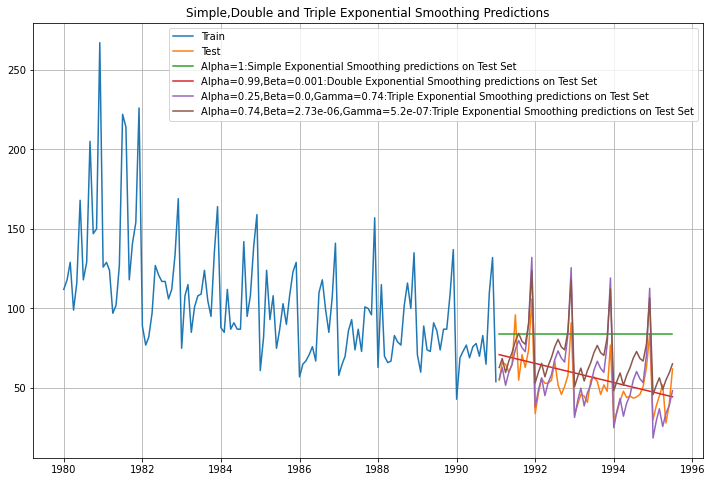

In [70]:
## Plotting the Training data, Test data and the forecasted values

plt.plot(train, label='Train')
plt.plot(test, label='Test')

plt.plot(SES_predict, label='Alpha=1:Simple Exponential Smoothing predictions on Test Set')
plt.plot(DES_predict, label='Alpha=0.99,Beta=0.001:Double Exponential Smoothing predictions on Test Set')
plt.plot(TES_predict, label='Alpha=0.25,Beta=0.0,Gamma=0.74:Triple Exponential Smoothing predictions on Test Set')
plt.plot(TES_predict_am, label='Alpha=0.74,Beta=2.73e-06,Gamma=5.2e-07:Triple Exponential Smoothing predictions on Test Set')

plt.legend(loc='best')
plt.grid()
plt.title('Simple,Double and Triple Exponential Smoothing Predictions');

In [71]:
print('TES_am RMSE:',mean_squared_error(test.values,TES_predict_am.values,squared=False))

TES_am RMSE: 18.67510963216421


In [72]:
resultsDf_temp = pd.DataFrame({'Test RMSE': [mean_squared_error(test.values,TES_predict_am.values,squared=False)]}
                           ,index=['Alpha=0.74,Beta=2.73e-06,Gamma=5.2e-07,Gamma=0:TES'])

resultsDf = pd.concat([resultsDf, resultsDf_temp])
resultsDf

,Test RMSE
"Alpha=0.99,SES",34.012215
"Alpha=1,Beta=0.0189:DES",15.040859
"Alpha=0.25,Beta=0.0,Gamma=0.74:TES",14.670057
"Alpha=0.74,Beta=2.73e-06,Gamma=5.2e-07,Gamma=0:TES",18.675110


In [73]:
print(df.shape)
print(train.shape)
print(test.shape)

(187, 1)
(133, 1)
(54, 1)


Linear Regression

In [74]:
train_time = [i+1 for i in range(len(train))]
test_time = [i+134 for i in range(len(test))]
print('Training Time instance','\n',train_time)
print('Test Time instance','\n',test_time)

Training Time instance 
 [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85, 86, 87, 88, 89, 90, 91, 92, 93, 94, 95, 96, 97, 98, 99, 100, 101, 102, 103, 104, 105, 106, 107, 108, 109, 110, 111, 112, 113, 114, 115, 116, 117, 118, 119, 120, 121, 122, 123, 124, 125, 126, 127, 128, 129, 130, 131, 132, 133]
Test Time instance 
 [134, 135, 136, 137, 138, 139, 140, 141, 142, 143, 144, 145, 146, 147, 148, 149, 150, 151, 152, 153, 154, 155, 156, 157, 158, 159, 160, 161, 162, 163, 164, 165, 166, 167, 168, 169, 170, 171, 172, 173, 174, 175, 176, 177, 178, 179, 180, 181, 182, 183, 184, 185, 186, 187]


In [75]:
LinearRegression_train = train.copy()
LinearRegression_test = test.copy()

In [76]:
LinearRegression_train['time'] = train_time
LinearRegression_test['time'] = test_time

In [77]:
from sklearn.linear_model import LinearRegression

In [78]:
lr = LinearRegression()

In [79]:
lr.fit(LinearRegression_train[['time']],LinearRegression_train['Rose'])

LinearRegression()

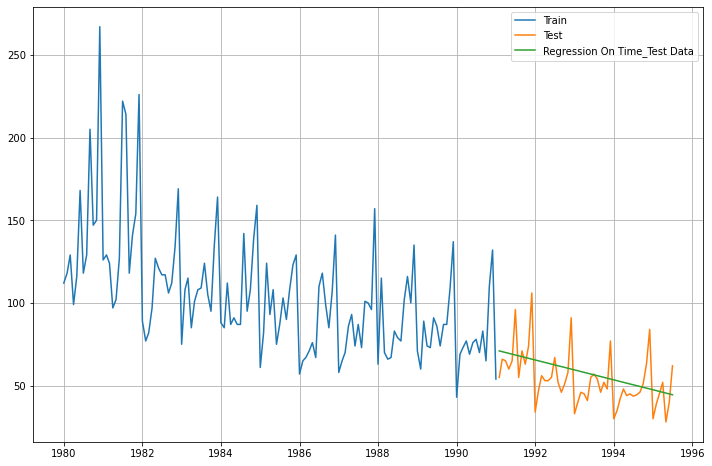

In [80]:
train_predictions_model1         = lr.predict(LinearRegression_train[['time']])
LinearRegression_train['RegOnTime'] = train_predictions_model1

test_predictions_model1         = lr.predict(LinearRegression_test[['time']])
LinearRegression_test['RegOnTime'] = test_predictions_model1

plt.plot( train['Rose'], label='Train')
plt.plot(test['Rose'], label='Test')
plt.plot(LinearRegression_test['RegOnTime'], label='Regression On Time_Test Data')

plt.legend(loc='best')
plt.grid();

In [81]:
from sklearn import metrics

In [84]:
rmse_model1_test = metrics.mean_squared_error(test['Rose'],test_predictions_model1,squared=False)
print("For RegressionOnTime forecast on the Test Data,  RMSE is %3.3f " %(rmse_model1_test))

For RegressionOnTime forecast on the Test Data,  RMSE is 15.041 


In [85]:
resultsDf = pd.DataFrame({'Test RMSE': [rmse_model1_test]},index=['RegressionOnTime'])
resultsDf

,Test RMSE
RegressionOnTime,15.040846


Naive Approach

In [86]:
NaiveModel_train = train.copy()
NaiveModel_test = test.copy()

In [87]:
NaiveModel_test['naive'] = np.asarray(train['Rose'])[len(np.asarray(train['Rose']))-1]
NaiveModel_test['naive'].head()

YearMonth
1991-02-01    54.0
1991-03-01    54.0
1991-04-01    54.0
1991-05-01    54.0
1991-06-01    54.0
Name: naive, dtype: float64

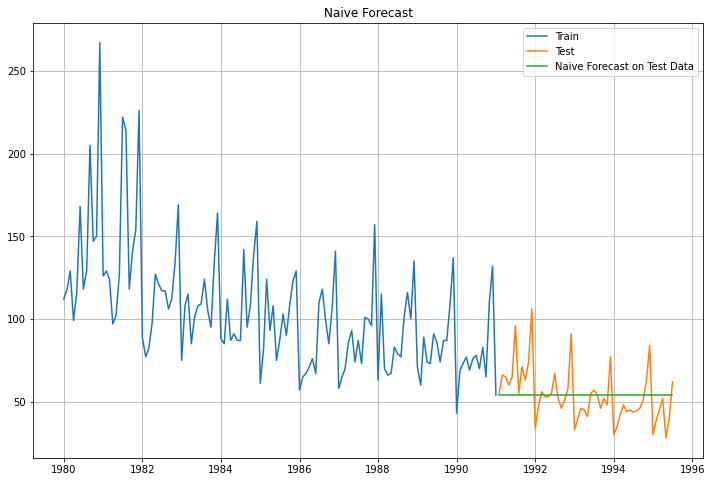

In [88]:
plt.plot(NaiveModel_train['Rose'], label='Train')
plt.plot(test['Rose'], label='Test')

plt.plot(NaiveModel_test['naive'], label='Naive Forecast on Test Data')

plt.legend(loc='best')
plt.title("Naive Forecast")
plt.grid();

In [89]:
rmse_model2_test = metrics.mean_squared_error(test['Rose'],NaiveModel_test['naive'],squared=False)
print("For RegressionOnTime forecast on the Test Data,  RMSE is %3.3f" %(rmse_model2_test))

For RegressionOnTime forecast on the Test Data,  RMSE is 15.937


In [90]:
resultsDf_2 = pd.DataFrame({'Test RMSE': [rmse_model2_test]},index=['NaiveModel'])

resultsDf = pd.concat([resultsDf, resultsDf_2])
resultsDf


,Test RMSE
RegressionOnTime,15.040846
NaiveModel,15.937414


Simple Average

In [91]:
SimpleAverage_train = train.copy()
SimpleAverage_test = test.copy()

In [92]:
SimpleAverage_test['mean_forecast'] = train['Rose'].mean()
SimpleAverage_test.head()

,Rose,mean_forecast
YearMonth,,
1991-02-01,55.0,104.556391
1991-03-01,66.0,104.556391
1991-04-01,65.0,104.556391
1991-05-01,60.0,104.556391
1991-06-01,65.0,104.556391


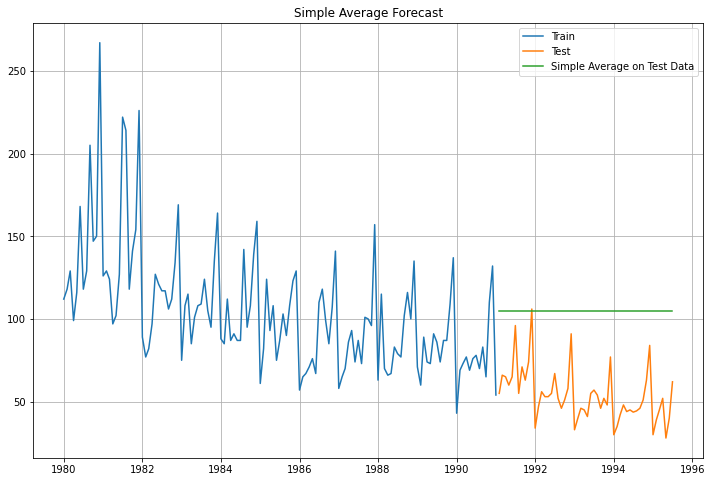

In [93]:
plt.plot(SimpleAverage_train['Rose'], label='Train')
plt.plot(SimpleAverage_test['Rose'], label='Test')

plt.plot(SimpleAverage_test['mean_forecast'], label='Simple Average on Test Data')

plt.legend(loc='best')
plt.title("Simple Average Forecast")
plt.grid();

In [94]:
rmse_model3_test = metrics.mean_squared_error(test['Rose'],SimpleAverage_test['mean_forecast'],squared=False)
print("For Simple Average forecast on the Test Data,  RMSE is %3.3f" %(rmse_model3_test))

For Simple Average forecast on the Test Data,  RMSE is 53.202


In [95]:
resultsDf_3 = pd.DataFrame({'Test RMSE': [rmse_model3_test]}
                           ,index=['SimpleAverageModel'])

resultsDf = pd.concat([resultsDf, resultsDf_3])
resultsDf

,Test RMSE
RegressionOnTime,15.040846
NaiveModel,15.937414
SimpleAverageModel,53.201811


Moving Average(MA)

In [96]:
MovingAverage = df.copy()
MovingAverage.head()

,Rose
YearMonth,
1980-01-01,112.0
1980-02-01,118.0
1980-03-01,129.0
1980-04-01,99.0
1980-05-01,116.0


In [97]:
MovingAverage['Trailing_2'] = MovingAverage['Rose'].rolling(2).mean()
MovingAverage['Trailing_4'] = MovingAverage['Rose'].rolling(4).mean()
MovingAverage['Trailing_6'] = MovingAverage['Rose'].rolling(6).mean()
MovingAverage['Trailing_9'] = MovingAverage['Rose'].rolling(9).mean()

MovingAverage.head()

,Rose,Trailing_2,Trailing_4,Trailing_6,Trailing_9
YearMonth,,,,,
1980-01-01,112.0,NaN,NaN,NaN,NaN
1980-02-01,118.0,115.0,NaN,NaN,NaN
1980-03-01,129.0,123.5,NaN,NaN,NaN
1980-04-01,99.0,114.0,114.5,NaN,NaN
1980-05-01,116.0,107.5,115.5,NaN,NaN


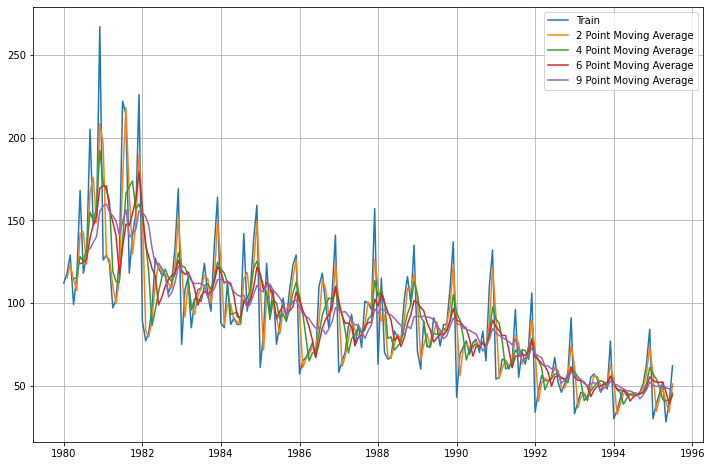

In [98]:
## Plotting on the whole data

plt.plot(MovingAverage['Rose'], label='Train')
plt.plot(MovingAverage['Trailing_2'], label='2 Point Moving Average')
plt.plot(MovingAverage['Trailing_4'], label='4 Point Moving Average')
plt.plot(MovingAverage['Trailing_6'],label = '6 Point Moving Average')
plt.plot(MovingAverage['Trailing_9'],label = '9 Point Moving Average')

plt.legend(loc = 'best')
plt.grid();

In [99]:
trailing_MovingAverage_train=MovingAverage[MovingAverage.index<='1991'] 
trailing_MovingAverage_test=MovingAverage[MovingAverage.index>'1991']

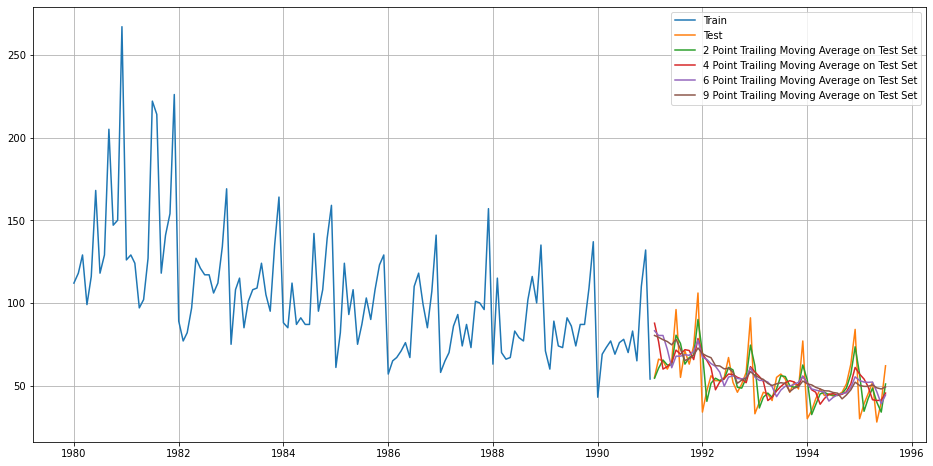

In [100]:
## Plotting on both the Training and Test data

plt.figure(figsize=(16,8))
plt.plot(trailing_MovingAverage_train['Rose'], label='Train')
plt.plot(trailing_MovingAverage_test['Rose'], label='Test')


plt.plot(trailing_MovingAverage_test['Trailing_2'], label='2 Point Trailing Moving Average on Test Set')
plt.plot(trailing_MovingAverage_test['Trailing_4'], label='4 Point Trailing Moving Average on Test Set')
plt.plot(trailing_MovingAverage_test['Trailing_6'],label = '6 Point Trailing Moving Average on Test Set')
plt.plot(trailing_MovingAverage_test['Trailing_9'],label = '9 Point Trailing Moving Average on Test Set')

plt.legend(loc = 'best')
plt.grid();

In [101]:
## Test Data - RMSE  --> 2 point Trailing MA

rmse_model4_test_2 = metrics.mean_squared_error(test['Rose'],trailing_MovingAverage_test['Trailing_2'],squared=False)
print("For 2 point Moving Average Model forecast on the Training Data,  RMSE is %3.3f" %(rmse_model4_test_2))

## Test Data - RMSE --> 4 point Trailing MA

rmse_model4_test_4 = metrics.mean_squared_error(test['Rose'],trailing_MovingAverage_test['Trailing_4'],squared=False)
print("For 4 point Moving Average Model forecast on the Training Data,  RMSE is %3.3f" %(rmse_model4_test_4))

## Test Data - RMSE --> 6 point Trailing MA

rmse_model4_test_6 = metrics.mean_squared_error(test['Rose'],trailing_MovingAverage_test['Trailing_6'],squared=False)
print("For 6 point Moving Average Model forecast on the Training Data,  RMSE is %3.3f" %(rmse_model4_test_6))

## Test Data - RMSE --> 9 point Trailing MA

rmse_model4_test_9 = metrics.mean_squared_error(test['Rose'],trailing_MovingAverage_test['Trailing_9'],squared=False)
print("For 9 point Moving Average Model forecast on the Training Data,  RMSE is %3.3f" %(rmse_model4_test_9))


For 2 point Moving Average Model forecast on the Training Data,  RMSE is 10.356
For 4 point Moving Average Model forecast on the Training Data,  RMSE is 13.736
For 6 point Moving Average Model forecast on the Training Data,  RMSE is 14.076
For 9 point Moving Average Model forecast on the Training Data,  RMSE is 14.384


In [102]:
resultsDf_4 = pd.DataFrame({'Test RMSE': [rmse_model4_test_2,rmse_model4_test_4
                                          ,rmse_model4_test_6,rmse_model4_test_9]}
                           ,index=['2pointTrailingMovingAverage','4pointTrailingMovingAverage'
                                   ,'6pointTrailingMovingAverage','9pointTrailingMovingAverage'])

resultsDf = pd.concat([resultsDf, resultsDf_4])
resultsDf

,Test RMSE
RegressionOnTime,15.040846
NaiveModel,15.937414
SimpleAverageModel,53.201811
2pointTrailingMovingAverage,10.355691
4pointTrailingMovingAverage,13.736403
6pointTrailingMovingAverage,14.076433
9pointTrailingMovingAverage,14.383541


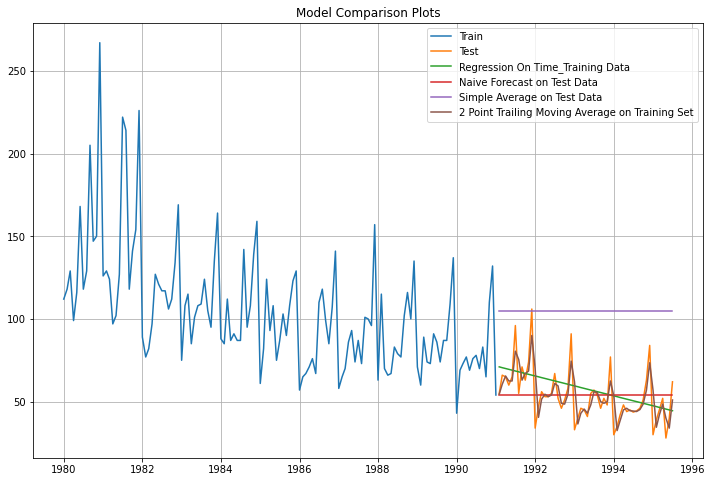

In [103]:
## Plotting on both Training and Test data

plt.plot(train['Rose'], label='Train')
plt.plot(test['Rose'], label='Test')

plt.plot(LinearRegression_test['RegOnTime'], label='Regression On Time_Training Data')

plt.plot(NaiveModel_test['naive'], label='Naive Forecast on Test Data')

plt.plot(SimpleAverage_test['mean_forecast'], label='Simple Average on Test Data')

plt.plot(trailing_MovingAverage_test['Trailing_2'], label='2 Point Trailing Moving Average on Training Set')


plt.legend(loc='best')
plt.title("Model Comparison Plots")
plt.grid();

In [104]:
from statsmodels.tsa.stattools import adfuller

In [105]:
dftest = adfuller(df,regression='ct')
print('DF test statistic is %3.3f' %dftest[0])
print('DF test p-value is' ,dftest[1])
print('Number of lags used' ,dftest[2])

DF test statistic is -2.240
DF test p-value is 0.4673888003070571
Number of lags used 13


In [106]:
dftest = adfuller(df.diff().dropna(),regression='ct')
print('DF test statistic is %3.3f' %dftest[0])
print('DF test p-value is' ,dftest[1])
print('Number of lags used' ,dftest[2])

DF test statistic is -8.160
DF test p-value is 3.0483314382160675e-11
Number of lags used 12


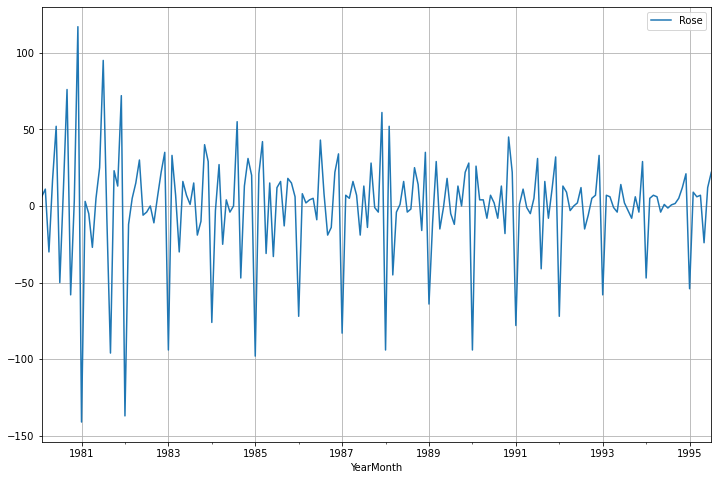

In [107]:
df.diff().dropna().plot(grid=True);

In [108]:
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

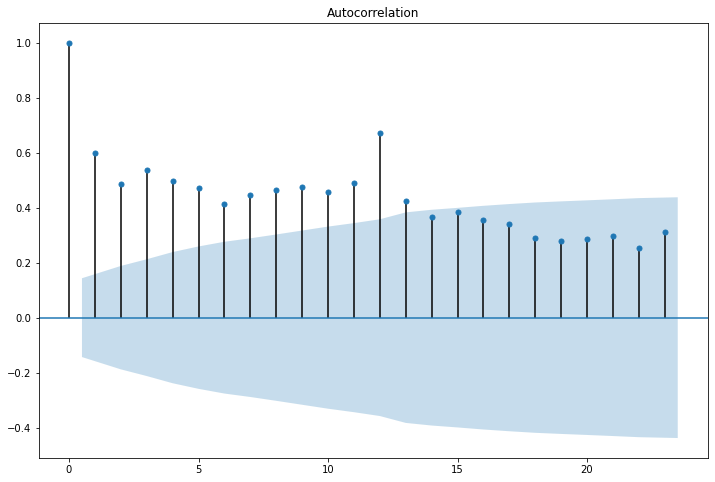

In [109]:
plot_acf(df,alpha=0.05);

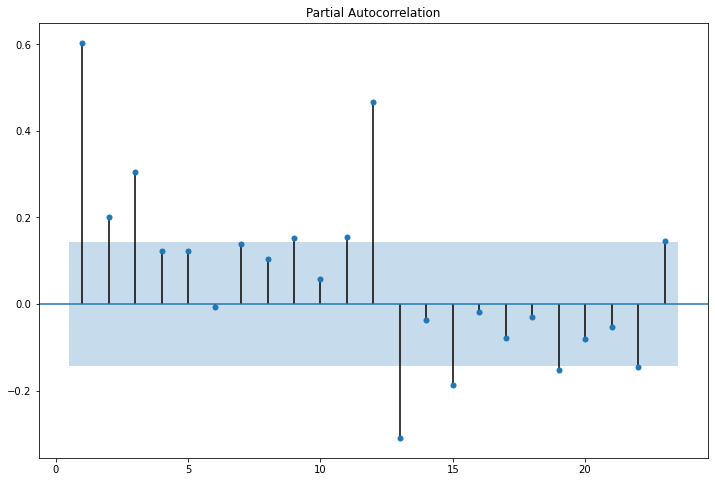

In [110]:
plot_pacf(df,zero=False,alpha=0.05);

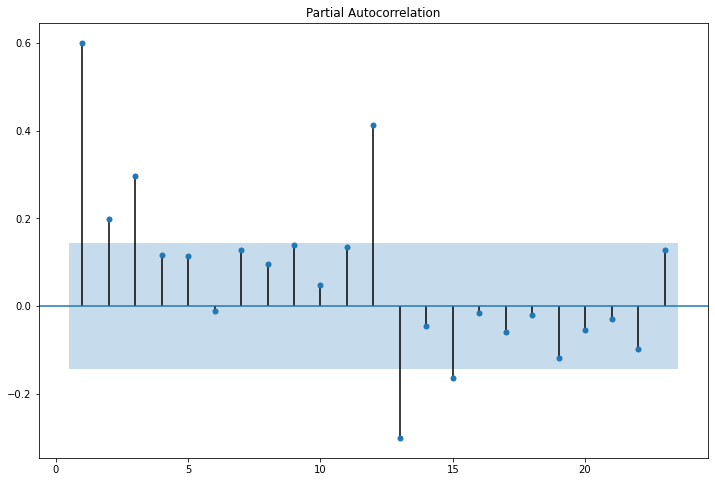

In [111]:
plot_pacf(df,zero=False,alpha=0.05,method='ywmle');

In [112]:
train = df[df.index<='1991'] 
test = df[df.index>'1991']

In [113]:
print(train.shape)
print(test.shape)

(133, 1)
(54, 1)


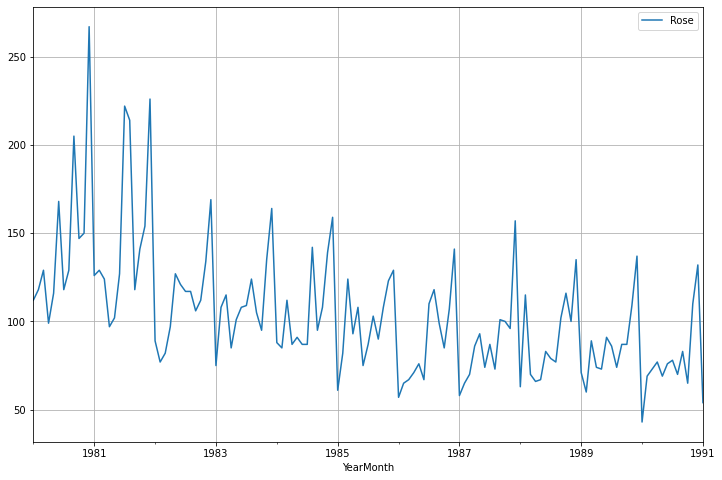

In [114]:
train.plot(grid=True);

In [115]:
dftest = adfuller(train,regression='ct')
print('DF test statistic is %3.3f' %dftest[0])
print('DF test p-value is' ,dftest[1])
print('Number of lags used' ,dftest[2])

DF test statistic is -1.710
DF test p-value is 0.7462869216865058
Number of lags used 13


In [116]:
dftest = adfuller(train.diff().dropna(),regression='ct')
print('DF test statistic is %3.3f' %dftest[0])
print('DF test p-value is' ,dftest[1])
print('Number of lags used' ,dftest[2])

DF test statistic is -6.860
DF test p-value is 2.9259295990247186e-08
Number of lags used 12


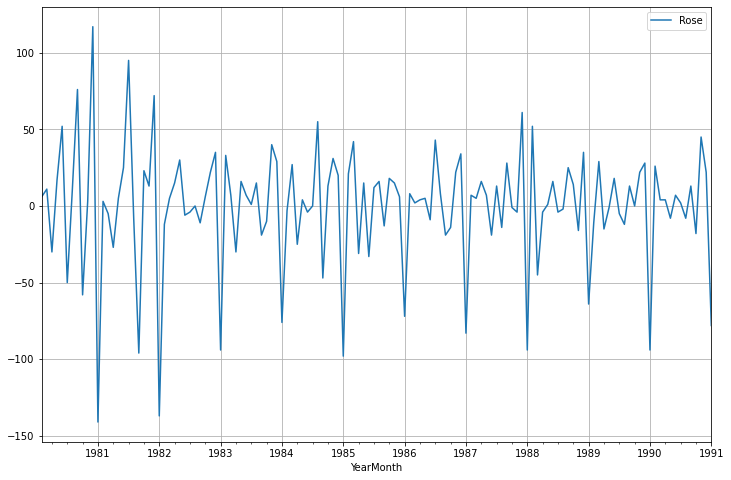

In [117]:
train.diff().dropna().plot(grid=True);

In [118]:
train.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 133 entries, 1980-01-01 to 1991-01-01
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Rose    133 non-null    float64
dtypes: float64(1)
memory usage: 2.1 KB


In [119]:
## The following loop helps us in getting a combination of different parameters of p and q in the range of 0 and 2
## We have kept the value of d as 1 as we need to take a difference of the series to make it stationary.

import itertools
p = q = range(0, 4)
d= range(1,2)
pdq = list(itertools.product(p, d, q))
print('Examples of the parameter combinations for the Model')
for i in range(0,len(pdq)):
    print('Model: {}'.format(pdq[i]))

Examples of the parameter combinations for the Model
Model: (0, 1, 0)
Model: (0, 1, 1)
Model: (0, 1, 2)
Model: (0, 1, 3)
Model: (1, 1, 0)
Model: (1, 1, 1)
Model: (1, 1, 2)
Model: (1, 1, 3)
Model: (2, 1, 0)
Model: (2, 1, 1)
Model: (2, 1, 2)
Model: (2, 1, 3)
Model: (3, 1, 0)
Model: (3, 1, 1)
Model: (3, 1, 2)
Model: (3, 1, 3)


In [120]:
# Creating an empty Dataframe with column names only
ARIMA_AIC = pd.DataFrame(columns=['param', 'AIC'])
ARIMA_AIC

,param,AIC


In [121]:
from statsmodels.tsa.arima.model import ARIMA

for param in pdq:# running a loop within the pdq parameters defined by itertools
    ARIMA_model = ARIMA(train['Rose'].values,order=param).fit()#fitting the ARIMA model
    #using the parameters from the loop
    print('ARIMA{} - AIC:{}'.format(param,ARIMA_model.aic))#printing the parameters and the AIC
    #from the fitted models
    ARIMA_AIC = ARIMA_AIC.append({'param':param, 'AIC': ARIMA_model.aic}, ignore_index=True)
    #appending the AIC values and the model parameters to the previously created data frame
    #for easier understanding and sorting of the AIC values

ARIMA(0, 1, 0) - AIC:1346.2963442404784
ARIMA(0, 1, 1) - AIC:1292.1624687397746
ARIMA(0, 1, 2) - AIC:1290.1883766617186
ARIMA(0, 1, 3) - AIC:1290.6918140187668
ARIMA(1, 1, 0) - AIC:1330.0647356043746
ARIMA(1, 1, 1) - AIC:1291.040644704888
ARIMA(1, 1, 2) - AIC:1290.0052207747622
ARIMA(1, 1, 3) - AIC:1291.981214747629
ARIMA(2, 1, 0) - AIC:1309.6368868507634
ARIMA(2, 1, 1) - AIC:1291.7627403654487
ARIMA(2, 1, 2) - AIC:1291.9768831944975


C:\Users\Muthu B\anaconda3\lib\site-packages\statsmodels\base\model.py:566: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


ARIMA(2, 1, 3) - AIC:1287.975814356143
ARIMA(3, 1, 0) - AIC:1308.3556419351532
ARIMA(3, 1, 1) - AIC:1292.5994206928917


C:\Users\Muthu B\anaconda3\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:965: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
C:\Users\Muthu B\anaconda3\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:977: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'


ARIMA(3, 1, 2) - AIC:1293.83404220713
ARIMA(3, 1, 3) - AIC:1288.3610395701876


C:\Users\Muthu B\anaconda3\lib\site-packages\statsmodels\base\model.py:566: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


In [122]:
ARIMA_AIC.sort_values(by='AIC',ascending=True).head()

,param,AIC
11,"(2, 1, 3)",1287.975814
15,"(3, 1, 3)",1288.361040
6,"(1, 1, 2)",1290.005221
2,"(0, 1, 2)",1290.188377
3,"(0, 1, 3)",1290.691814


In [123]:
auto_ARIMA = ARIMA(train, order=(2,1,3))

results_auto_ARIMA = auto_ARIMA.fit()

print(results_auto_ARIMA.summary())

C:\Users\Muthu B\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'
C:\Users\Muthu B\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'
C:\Users\Muthu B\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'
C:\Users\Muthu B\anaconda3\lib\site-packages\statsmodels\base\model.py:566: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


                               SARIMAX Results                                
Dep. Variable:                   Rose   No. Observations:                  133
Model:                 ARIMA(2, 1, 3)   Log Likelihood                -637.988
Date:                Sun, 25 Apr 2021   AIC                           1287.976
Time:                        19:12:03   BIC                           1305.273
Sample:                    01-01-1980   HQIC                          1295.004
                         - 01-01-1991                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -1.6955      0.056    -30.042      0.000      -1.806      -1.585
ar.L2         -0.8626      0.057    -15.215      0.000      -0.974      -0.752
ma.L1          0.9576      0.102      9.433      0.0

Diagnostics plot.

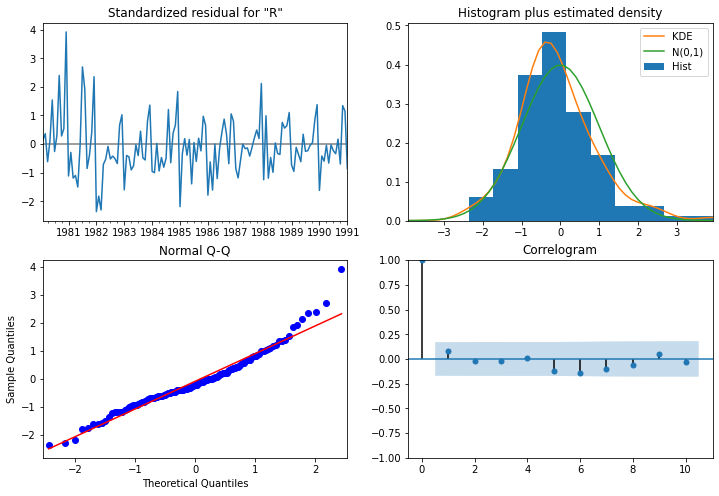

In [124]:
results_auto_ARIMA.plot_diagnostics();

Predict on the Test Set using this model and evaluate the model.

In [127]:
predicted_auto_ARIMA = results_auto_ARIMA.forecast(steps=len(test))

In [125]:
## Mean Absolute Percentage Error (MAPE) - Function Definition

def mean_absolute_percentage_error(y_true, y_pred):
    return np.mean((np.abs(y_true-y_pred))/(y_true))*100

## Importing the mean_squared_error function from sklearn to calculate the RMSE

from sklearn.metrics import mean_squared_error

In [128]:
rmse = mean_squared_error(test['Rose'],predicted_auto_ARIMA,squared=False)
mape = mean_absolute_percentage_error(test['Rose'],predicted_auto_ARIMA)
print('RMSE:',rmse,'\nMAPE:',mape)

RMSE: 33.95504223628687 
MAPE: 69.89840570901818


In [129]:
resultsDf = pd.DataFrame({'RMSE': rmse,'MAPE':mape}
                           ,index=['ARIMA(2,1,2)'])

resultsDf

,RMSE,MAPE
"ARIMA(2,1,2)",33.955042,69.898406


Build an Automated version of a SARIMA model for which the best parameters are selected in accordance with the lowest Akaike Information Criteria (AIC).

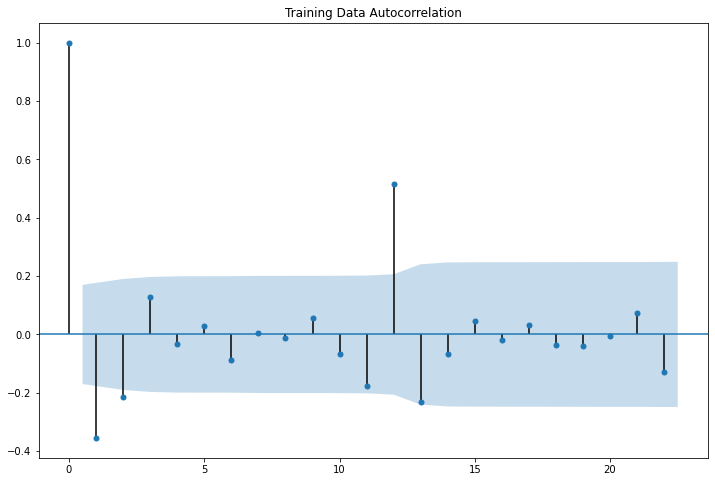

In [130]:
plot_acf(train.diff(),title='Training Data Autocorrelation',missing='drop');

In [131]:
import itertools
p = q = range(0, 4)
d= range(1,2)
D = range(0,1)
pdq = list(itertools.product(p, d, q))
PDQ = [(x[0], x[1], x[2], 6) for x in list(itertools.product(p, D, q))]
print('Examples of the parameter combinations for the Model are')
for i in range(1,len(pdq)):
    print('Model: {}{}'.format(pdq[i], PDQ[i]))

Examples of the parameter combinations for the Model are
Model: (0, 1, 1)(0, 0, 1, 6)
Model: (0, 1, 2)(0, 0, 2, 6)
Model: (0, 1, 3)(0, 0, 3, 6)
Model: (1, 1, 0)(1, 0, 0, 6)
Model: (1, 1, 1)(1, 0, 1, 6)
Model: (1, 1, 2)(1, 0, 2, 6)
Model: (1, 1, 3)(1, 0, 3, 6)
Model: (2, 1, 0)(2, 0, 0, 6)
Model: (2, 1, 1)(2, 0, 1, 6)
Model: (2, 1, 2)(2, 0, 2, 6)
Model: (2, 1, 3)(2, 0, 3, 6)
Model: (3, 1, 0)(3, 0, 0, 6)
Model: (3, 1, 1)(3, 0, 1, 6)
Model: (3, 1, 2)(3, 0, 2, 6)
Model: (3, 1, 3)(3, 0, 3, 6)


In [132]:
SARIMA_AIC = pd.DataFrame(columns=['param','seasonal', 'AIC'])
SARIMA_AIC

,param,seasonal,AIC


In [134]:
import statsmodels.api as sm

for param in pdq:
    for param_seasonal in PDQ:
        SARIMA_model = sm.tsa.statespace.SARIMAX(train['Rose'].values,
                                            order=param,
                                            seasonal_order=param_seasonal,
                                            enforce_stationarity=False,
                                            enforce_invertibility=False)
            
        results_SARIMA = SARIMA_model.fit(maxiter=1000)
        print('SARIMA{}x{} - AIC:{}'.format(param, param_seasonal, results_SARIMA.aic))
        SARIMA_AIC = SARIMA_AIC.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)

SARIMA(0, 1, 0)x(0, 0, 0, 6) - AIC:1337.085435720141
SARIMA(0, 1, 0)x(0, 0, 1, 6) - AIC:1277.6945717425872
SARIMA(0, 1, 0)x(0, 0, 2, 6) - AIC:1154.591145659475
SARIMA(0, 1, 0)x(0, 0, 3, 6) - AIC:1090.9259206271163
SARIMA(0, 1, 0)x(1, 0, 0, 6) - AIC:1287.8974782659836
SARIMA(0, 1, 0)x(1, 0, 1, 6) - AIC:1254.6080807665858
SARIMA(0, 1, 0)x(1, 0, 2, 6) - AIC:1156.2438260747035
SARIMA(0, 1, 0)x(1, 0, 3, 6) - AIC:1069.1182104573045
SARIMA(0, 1, 0)x(2, 0, 0, 6) - AIC:1147.4621876207589
SARIMA(0, 1, 0)x(2, 0, 1, 6) - AIC:1147.2539239185671
SARIMA(0, 1, 0)x(2, 0, 2, 6) - AIC:1126.5825422430132
SARIMA(0, 1, 0)x(2, 0, 3, 6) - AIC:1068.6573395923306
SARIMA(0, 1, 0)x(3, 0, 0, 6) - AIC:1081.8346438832461
SARIMA(0, 1, 0)x(3, 0, 1, 6) - AIC:1070.9026535014946
SARIMA(0, 1, 0)x(3, 0, 2, 6) - AIC:1067.8146073917542
SARIMA(0, 1, 0)x(3, 0, 3, 6) - AIC:1068.1777310592215
SARIMA(0, 1, 1)x(0, 0, 0, 6) - AIC:1273.386393100886
SARIMA(0, 1, 1)x(0, 0, 1, 6) - AIC:1211.377450132579
SARIMA(0, 1, 1)x(0, 0, 2, 6) - A

C:\Users\Muthu B\anaconda3\lib\site-packages\statsmodels\base\model.py:566: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


SARIMA(0, 1, 2)x(3, 0, 1, 6) - AIC:1016.0913908524467
SARIMA(0, 1, 2)x(3, 0, 2, 6) - AIC:1010.5430235130748
SARIMA(0, 1, 2)x(3, 0, 3, 6) - AIC:971.0370803736736
SARIMA(0, 1, 3)x(0, 0, 0, 6) - AIC:1254.0066296490902
SARIMA(0, 1, 3)x(0, 0, 1, 6) - AIC:1193.541875652122
SARIMA(0, 1, 3)x(0, 0, 2, 6) - AIC:1083.8835974109645
SARIMA(0, 1, 3)x(0, 0, 3, 6) - AIC:1006.1756254005716
SARIMA(0, 1, 3)x(1, 0, 0, 6) - AIC:1230.9740978490886
SARIMA(0, 1, 3)x(1, 0, 1, 6) - AIC:1149.2450993708487
SARIMA(0, 1, 3)x(1, 0, 2, 6) - AIC:1072.0601824050632
SARIMA(0, 1, 3)x(1, 0, 3, 6) - AIC:1000.5330973164254
SARIMA(0, 1, 3)x(2, 0, 0, 6) - AIC:1097.7593440093235
SARIMA(0, 1, 3)x(2, 0, 1, 6) - AIC:1099.4622823300133
SARIMA(0, 1, 3)x(2, 0, 2, 6) - AIC:1041.4326810258701
SARIMA(0, 1, 3)x(2, 0, 3, 6) - AIC:959.9512451963406
SARIMA(0, 1, 3)x(3, 0, 0, 6) - AIC:1029.9871311630147
SARIMA(0, 1, 3)x(3, 0, 1, 6) - AIC:1016.5816967825126
SARIMA(0, 1, 3)x(3, 0, 2, 6) - AIC:1009.6617795286642
SARIMA(0, 1, 3)x(3, 0, 3, 6) - 

In [135]:
SARIMA_AIC.sort_values(by=['AIC']).head()

,param,seasonal,AIC
187,"(2, 1, 3)","(2, 0, 3, 6)",959.742454
59,"(0, 1, 3)","(2, 0, 3, 6)",959.951245
251,"(3, 1, 3)","(2, 0, 3, 6)",960.677558
191,"(2, 1, 3)","(3, 0, 3, 6)",961.243775
123,"(1, 1, 3)","(2, 0, 3, 6)",961.598216


In [136]:
import statsmodels.api as sm

auto_SARIMA = sm.tsa.statespace.SARIMAX(train['Rose'],
                                order=(2, 1, 3),
                                seasonal_order=(2, 0, 3, 6),
                                enforce_stationarity=False,
                                enforce_invertibility=False)
results_auto_SARIMA = auto_SARIMA.fit(maxiter=1000)
print(results_auto_SARIMA.summary())

C:\Users\Muthu B\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'
C:\Users\Muthu B\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'


                                     SARIMAX Results                                     
Dep. Variable:                              Rose   No. Observations:                  133
Model:             SARIMAX(2, 1, 3)x(2, 0, 3, 6)   Log Likelihood                -468.871
Date:                           Sun, 25 Apr 2021   AIC                            959.742
Time:                                   19:29:23   BIC                            989.448
Sample:                               01-01-1980   HQIC                           971.791
                                    - 01-01-1991                                         
Covariance Type:                             opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.5024      0.082     -6.103      0.000      -0.664      -0.341
ar.L2         -0.6646      0.083     -8.026

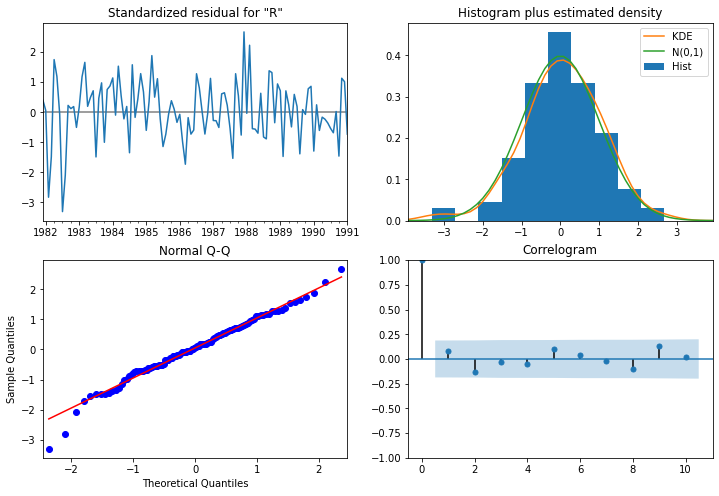

In [137]:
results_auto_SARIMA.plot_diagnostics();

In [138]:
predicted_auto_SARIMA = results_auto_SARIMA.get_forecast(steps=len(test))

In [139]:
predicted_auto_SARIMA.summary_frame(alpha=0.05).head()

Rose,mean,mean_se,mean_ci_lower,mean_ci_upper
1991-02-01,63.270947,16.260901,31.400167,95.141728
1991-03-01,73.418861,16.401468,41.272575,105.565147
1991-04-01,76.980965,16.495041,44.651278,109.310652
1991-05-01,78.081588,16.612379,45.521923,110.641252
1991-06-01,77.449801,16.612474,44.889950,110.009651


In [140]:
rmse = mean_squared_error(test['Rose'],predicted_auto_SARIMA.predicted_mean,squared=False)
mape = mean_absolute_percentage_error(test['Rose'],predicted_auto_SARIMA.predicted_mean)
print('RMSE:',rmse,'\nMAPE:',mape)

RMSE: 26.567357981554622 
MAPE: 54.059914860900925


In [151]:
temp_resultsDf = pd.DataFrame({'RMSE': rmse,'MAPE':mape}
                           ,index=['SARIMA(2,1,3)(2,0,3,6)'])


resultsDf = pd.concat([resultsDf,temp_resultsDf])

resultsDf

,RMSE,MAPE
"ARIMA(2,1,2)",33.955042,69.898406
"SARIMA(2,1,3)(2,0,3,6)",26.567358,54.059915


Build a version of the ARIMA model for which the best parameters are selected by looking at the ACF and the PACF plots.

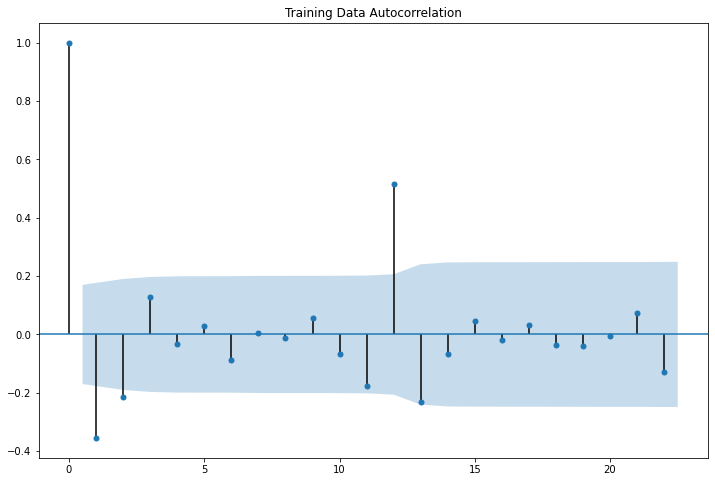

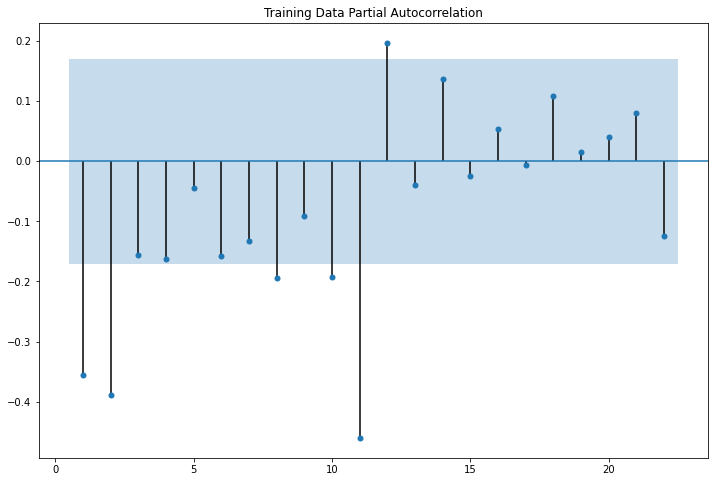

In [152]:
plot_acf(train.diff(),title='Training Data Autocorrelation',missing='drop')
plot_pacf(train.diff().dropna(),title='Training Data Partial Autocorrelation',zero=False,method='ywmle')
plt.show()

In [154]:
manual_ARIMA = ARIMA(train['Rose'], order=(2,1,2),freq='MS')

results_manual_ARIMA = manual_ARIMA.fit()

print(results_manual_ARIMA.summary())

C:\Users\Muthu B\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'


                               SARIMAX Results                                
Dep. Variable:                   Rose   No. Observations:                  133
Model:                 ARIMA(2, 1, 2)   Log Likelihood                -640.988
Date:                Sun, 25 Apr 2021   AIC                           1291.977
Time:                        20:09:35   BIC                           1306.391
Sample:                    01-01-1980   HQIC                          1297.834
                         - 01-01-1991                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.4634      0.446     -1.040      0.299      -1.337       0.410
ar.L2         -0.0186      0.160     -0.116      0.907      -0.332       0.295
ma.L1         -0.2568      0.436     -0.589      0.5

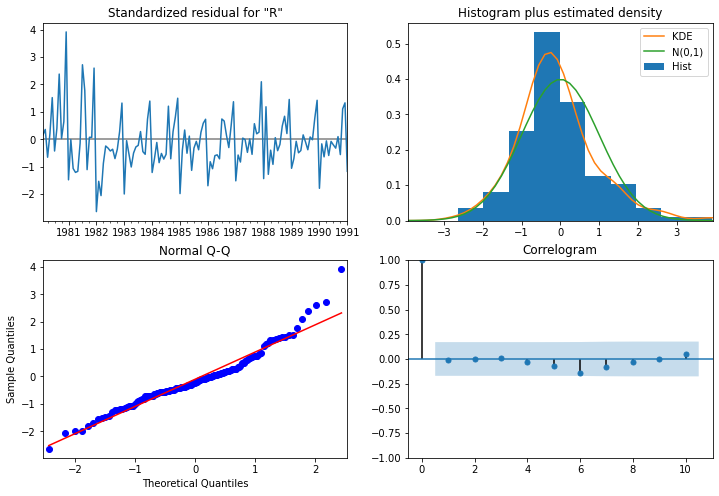

In [155]:
results_manual_ARIMA.plot_diagnostics();

In [156]:
predicted_manual_ARIMA = results_manual_ARIMA.forecast(steps=len(test))

In [157]:
rmse = mean_squared_error(test['Rose'],predicted_manual_ARIMA,squared=False)
mape = mean_absolute_percentage_error(test['Rose'],predicted_manual_ARIMA)
print('RMSE:',rmse,'\nMAPE:',mape)

RMSE: 33.53250022906191 
MAPE: 69.18579900931977


In [158]:
temp_resultsDf = pd.DataFrame({'RMSE': rmse,'MAPE':mape}
                           ,index=['ARIMA(2,1,2)'])


resultsDf = pd.concat([resultsDf,temp_resultsDf])

resultsDf

,RMSE,MAPE
"ARIMA(2,1,2)",33.955042,69.898406
"SARIMA(2,1,3)(2,0,3,6)",26.567358,54.059915
"ARIMA(2,1,2)",33.532500,69.185799


Build a version of the SARIMA model for which the best parameters are selected by looking at the ACF and the PACF plots. - Seasonality at 6.

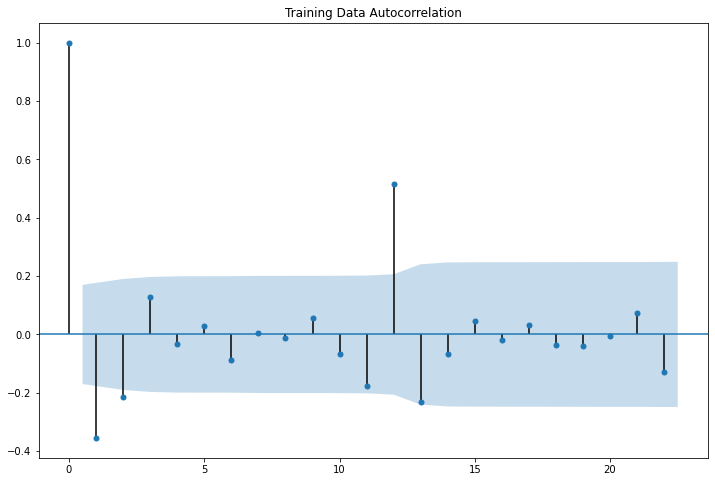

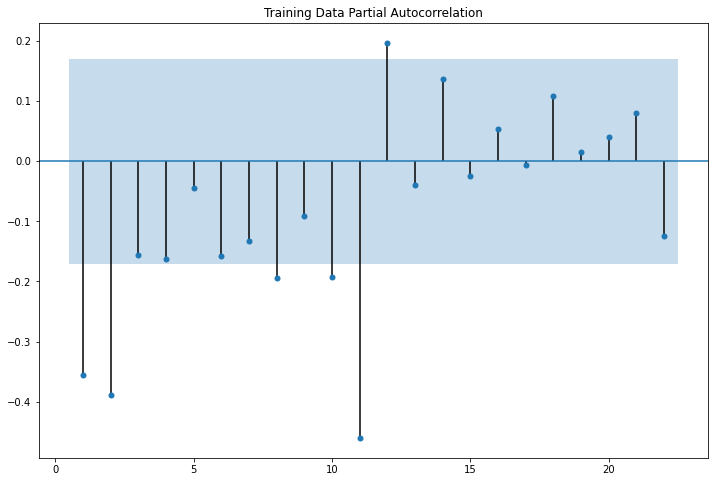

In [159]:
plot_acf(train.diff(),title='Training Data Autocorrelation',missing='drop')
plot_pacf(train.diff().dropna(),title='Training Data Partial Autocorrelation',zero=False,method='ywmle');

In [161]:
import statsmodels.api as sm

manual_SARIMA = sm.tsa.statespace.SARIMAX(train['Rose'],
                                order=(2,1,2),
                                seasonal_order=(0, 0, 3, 6),
                                enforce_stationarity=False,
                                enforce_invertibility=False)
results_manual_SARIMA = manual_SARIMA.fit(maxiter=1000)
print(results_manual_SARIMA.summary())

C:\Users\Muthu B\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'
C:\Users\Muthu B\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'


                                         SARIMAX Results                                         
Dep. Variable:                                      Rose   No. Observations:                  133
Model:             SARIMAX(2, 1, 2)x(0, 0, [1, 2, 3], 6)   Log Likelihood                -498.852
Date:                                   Sun, 25 Apr 2021   AIC                           1013.705
Time:                                           20:15:30   BIC                           1035.381
Sample:                                       01-01-1980   HQIC                          1022.498
                                            - 01-01-1991                                         
Covariance Type:                                     opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.5902      0.082     -7.241      0.000    

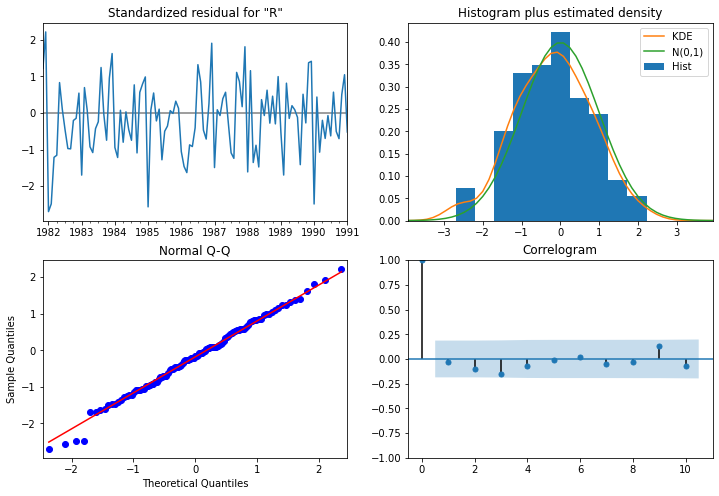

In [162]:
results_manual_SARIMA.plot_diagnostics()
plt.show()

In [163]:
predicted_manual_SARIMA = results_manual_SARIMA.get_forecast(steps=len(test))

In [164]:
rmse = mean_squared_error(test['Rose'],predicted_manual_SARIMA.predicted_mean,squared=False)
mape = mean_absolute_percentage_error(test['Rose'],predicted_manual_SARIMA.predicted_mean)
print('RMSE:',rmse,'\nMAPE:',mape)

RMSE: 31.879424686652992 
MAPE: 65.25628716848459


In [165]:
temp_resultsDf = pd.DataFrame({'RMSE': [rmse],'MAPE':mape}
                           ,index=['SARIMA(2,1,2)(0,0,3,6)'])


resultsDf = pd.concat([resultsDf,temp_resultsDf])

resultsDf

,RMSE,MAPE
"ARIMA(2,1,2)",33.955042,69.898406
"SARIMA(2,1,3)(2,0,3,6)",26.567358,54.059915
"ARIMA(2,1,2)",33.532500,69.185799
"SARIMA(2,1,2)(0,0,3,6)",31.879425,65.256287


Consolidated dataframe of all RMSE values of all models built are given in the answer report

Full data forecast

In [169]:
full_data_model = sm.tsa.statespace.SARIMAX(df['Rose'],
                                order=(2,1,3),
                                seasonal_order=(2, 0, 3, 6),
                                enforce_stationarity=False,
                                enforce_invertibility=False)
results_full_data_model = full_data_model.fit(maxiter=1000)
print(results_full_data_model.summary())

C:\Users\Muthu B\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'
C:\Users\Muthu B\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'


                                     SARIMAX Results                                     
Dep. Variable:                              Rose   No. Observations:                  187
Model:             SARIMAX(2, 1, 3)x(2, 0, 3, 6)   Log Likelihood                -675.369
Date:                           Sun, 25 Apr 2021   AIC                           1372.738
Time:                                   22:03:35   BIC                           1406.837
Sample:                               01-01-1980   HQIC                          1386.581
                                    - 07-01-1995                                         
Covariance Type:                             opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.5253      0.061     -8.652      0.000      -0.644      -0.406
ar.L2         -0.6847      0.054    -12.718

In [170]:
predicted_manual_SARIMA_full_data = results_full_data_model.get_forecast(steps=12)

In [171]:
pred_full_manual_SARIMA_date = predicted_manual_SARIMA_full_data.summary_frame(alpha=0.05)
pred_full_manual_SARIMA_date.head()

Rose,mean,mean_se,mean_ci_lower,mean_ci_upper
1995-08-01,52.526748,14.307575,24.484416,80.569080
1995-09-01,45.717615,14.686078,16.933431,74.501800
1995-10-01,48.362928,14.923496,19.113413,77.612444
1995-11-01,54.238952,14.926104,24.984325,83.493579
1995-12-01,72.334826,15.022422,42.891421,101.778231


In [173]:
rmse = mean_squared_error(df['Rose'],results_full_data_model.fittedvalues,squared=False)
print('RMSE of the Full Model',rmse)

RMSE of the Full Model 25.51546247224212


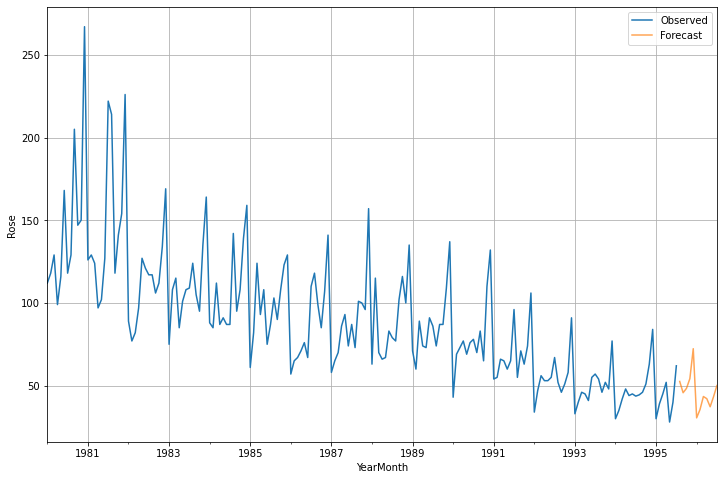

In [174]:
axis = df['Rose'].plot(label='Observed')
pred_full_manual_SARIMA_date['mean'].plot(ax=axis, label='Forecast', alpha=0.7)

axis.set_xlabel('YearMonth')
axis.set_ylabel('Rose')
plt.legend(loc='best')
plt.grid();